# Exploring data for the attention index

The idea of the attention index is to provide a score that indicates the impact of an article, and can easily be aggregated by subject, publisher or other axis.

The index comprises of two parts:

- **promotion** how important the article was to the publisher, based on the extent to which they chose to editorially promote it
- **response** how readers reacted to the article, based on social engagements

The index will be a number between 0 and 100. 50% is driven by the promotion, and 50% by response:

![Attention Index](../images/kaleida-attention-index-data-factors-chart.png)

### Promotion Score

The promotion score should take into account:

- whether the publisher chose make the article a lead article on their primary front (30%)
- how long the publisher chose to retain the article on their front (40%)
- whether they chose to push the article on their facebook brand page (30%)

It should be scaled based on the value of that promotion, so a popular, well-visited site should score higher than one on the fringes. And similarly a powerful, well-followed brand page should score higher than one less followed.

### Response Score

The response score takes into account the number of engagements on Facebook. 



The rest of this notebook explores how those numbers could work, starting with the response score because that is easier, I think.

# Setup

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("articles_2017-08-01_2017-08-31.csv", index_col="id", \
                   parse_dates=["published", "discovered"])
data.head()

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank
id,,,,,,,,,,,,,,,,,,,
103d30e1ada75aa031d84f88af50d113184ea4ed,https://www.theguardian.com/lifeandstyle/2017/...,Break down barriers to breastfeeding in the UK,2017-08-01 00:03:02.887,2017-08-01 00:00:02.000,294,0.822802,2017-08-01T08:32:01.637Z,20,220,54,The Guardian,theguardian_com,0,449,85.0,False,NaN,NaN,142
dedd4245cfa237afcd5f543960e04ae90b26ac48,https://www.thetimes.co.uk/article/breastfeedi...,Breastfeeding ‘should be a school subject’,2017-08-01 00:00:03.958,2017-08-01 00:00:03.958,41,0.112903,2017-08-01T14:42:00.635Z,21,12,8,The Times,thetimes_co_uk,0,1380,238.0,False,NaN,NaN,6435
18c2ab6d72b11232f9df96b3748b26519368b810,http://www.huffingtonpost.com/entry/washington...,Washington's Marijuana Legalization: The Kids ...,2017-08-01 00:03:18.131,2017-08-01 00:00:20.436,122,0.258134,2017-08-01T08:32:01.645Z,7,70,45,HuffPost,huffingtonpost_com,0,0,NaN,False,NaN,NaN,215
e798d89b959cf713fe3658c2ee296af4bc9361e5,http://www.huffingtonpost.com/entry/an-ounce-o...,An Ounce of Love Creates a Ton of Healing,2017-08-01 00:03:18.059,2017-08-01 00:00:23.485,4,0.016133,2017-08-01T20:56:00.086Z,0,1,3,HuffPost,huffingtonpost_com,0,0,NaN,False,NaN,NaN,215
092977d2eacec21b414928bf580d5caeb849e9c0,https://www.washingtonpost.com/news/retropolis...,The only communications director booted faster...,2017-08-01 00:03:09.289,2017-08-01 00:00:28.000,1611,11.112903,2017-08-01T01:18:02.072Z,198,1266,147,The Washington Post,washingtonpost_com,0,1020,74.0,True,5962099.0,2017-08-01T00:15:15.000Z,191


# Response Score

The response score is a number between 0 and 50 that indicates the level of response to an article.



Perhaps in the future we may choose to include other factors, but for now we just include engagements on Facebook. The maximum score of 50 should be achieved by an article that does really well compared with others.

In [3]:
pd.options.display.float_format = '{:.2f}'.format
data.fb_engagements.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count    148391.00
mean       1542.71
std       12427.44
min           0.00
50%          29.00
75%         300.00
90%        2085.00
95%        5631.50
99%       27998.00
99.5%     46698.40
99.9%    130402.22
max     2362234.00
Name: fb_engagements, dtype: float64

There's a few articles there with 1 million plus engagements, let's just double check that.

In [4]:
data[data.fb_engagements > 1000000]

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank
id,,,,,,,,,,,,,,,,,,,
478a416c259d9028be1860e8b63518fae553fa8f,http://www.huffingtonpost.com/entry/tina-fey-s...,"Tina Fey Absolutely Destroys Nazis, Trump & Pa...",2017-08-18 07:55:03.814,2017-08-18 07:46:45,1053024,971.27,2017-08-18T15:50:00.454Z,122164,815305,115555,HuffPost,huffingtonpost_com,0,1909,28.00,True,9683181.00,2017-08-18T12:30:59.000Z,215
01c376d7653532da2d4251733e10e3f400ca4afa,http://www.bbc.co.uk/news/entertainment-arts-4...,Sir Bruce Forsyth: TV legend dies aged 89,2017-08-18 15:36:07.209,2017-08-18 15:35:22,1033767,8477.44,2017-08-18T16:02:02.360Z,125104,695601,213062,BBC,bbc_co_uk,0,1134,55.00,True,43514982.00,2017-08-18T15:36:50.000Z,96
3a62bf1003c686e38634844245aeb7a11f1c2be7,http://www.independent.co.uk/news/world/americ...,Trapped Mexican bakers make 'pan dulce' bread ...,2017-08-30 20:42:20.971,2017-08-30 18:47:44,2362234,2191.75,2017-08-31T03:50:01.773Z,80669,2064103,217462,The Independent,independent_co_uk,0,434,221.00,True,7368466.00,2017-08-30T23:01:00.000Z,386


In [5]:
data.fb_engagements.mode()

0    0
dtype: int64

Going back to the enagement counts, we see the mean is 1,542, mode is zero, median is 29, 90th percentile is 2,085, 99th percentile is 27,998, 99.5th percentile is 46,698. The standard deviation is 12,427, significantly higher than the mean, so this is not a normal distribution. 

We want to provide a sensible way of allocating this to the 50 buckets we have available. Let's just bucket geometrically first:

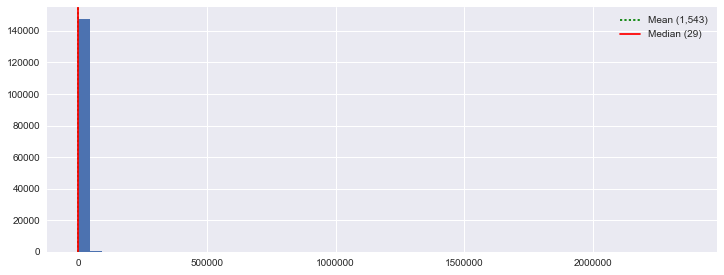

In [6]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()

plt.figure(figsize=(12,4.5))
plt.hist(data.fb_engagements, bins=50)
plt.axvline(mean, linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(median, label=f'Median ({median:,.0f})', color='red')
leg = plt.legend()


Well that's not very useful. Almost everything will score less than 0 if we just do that, which isn't a useful metric.

Let's start by excluding zeros.

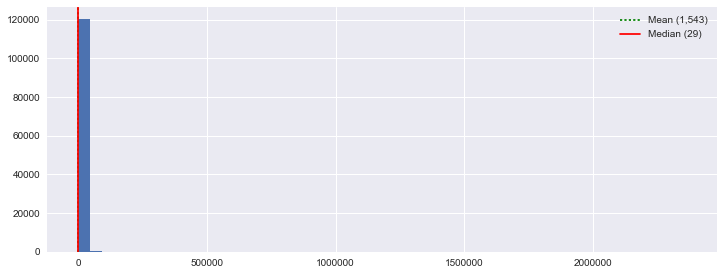

In [7]:
non_zero_fb_enagagements = data.fb_engagements[data.fb_engagements > 0]

plt.figure(figsize=(12,4.5))
plt.hist(non_zero_fb_enagagements, bins=50)
plt.axvline(mean, linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(median, label=f'Median ({median:,.0f})', color='red')
leg = plt.legend()

That's still a big number at the bottom, and so not a useful score.

Next, we exclude the outliers: cap at the 99.9th percentile (i.e. 119211), so that 0.1% of articles should receive the maximum score.


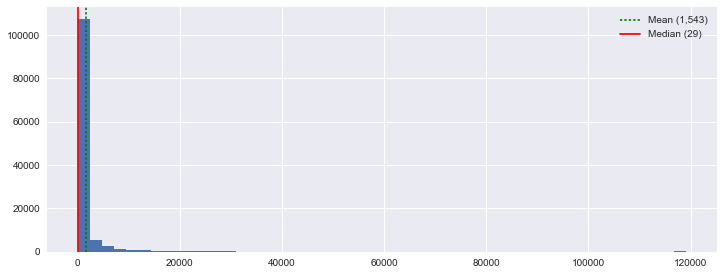

In [8]:
non_zero_fb_enagagements_without_outliers = non_zero_fb_enagagements.clip_upper(119211)

plt.figure(figsize=(12,4.5))
plt.hist(non_zero_fb_enagagements_without_outliers, bins=50)
plt.axvline(mean, linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(median, label=f'Median ({median:,.0f})', color='red')
leg = plt.legend()

That's a bit better, but still way too clustered at the low end. Let's look at a log normal distribution.

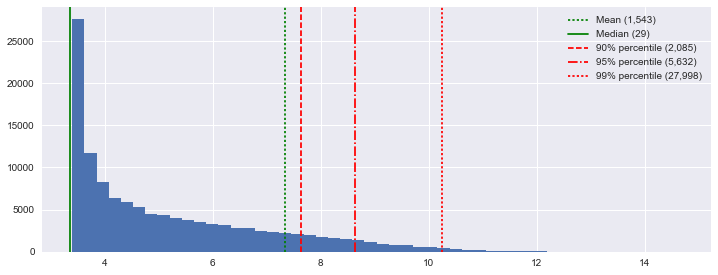

In [9]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()
ninety = data.fb_engagements.quantile(.90)
ninetyfive = data.fb_engagements.quantile(.95)
ninetynine = data.fb_engagements.quantile(.99)

plt.figure(figsize=(12,4.5))
plt.hist(np.log(non_zero_fb_enagagements + median), bins=50)
plt.axvline(np.log(mean), linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(np.log(median), label=f'Median ({median:,.0f})', color='green')
plt.axvline(np.log(ninety), linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axvline(np.log(ninetyfive), linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
plt.axvline(np.log(ninetynine), linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')
leg = plt.legend()


That's looking a bit more interesting.

After some exploration, to avoid too much emphasis on the lower end of the scale, we move the numbers to the right a bit by adding on the median.

In [10]:
log_engagements = (non_zero_fb_enagagements
                   .clip_upper(data.fb_engagements.quantile(.999))
                   .apply(lambda x: np.log(x + median))
                  )
log_engagements.describe()

count   121131.00
mean         5.19
std          1.81
min          3.40
25%          3.66
50%          4.55
75%          6.26
max         11.78
Name: fb_engagements, dtype: float64

Use standard feature scaling to bring that to a 1 to 50 range


In [11]:
def scale_log_engagements(engagements_logged):
    return np.ceil(
        50 * (engagements_logged - log_engagements.min()) / (log_engagements.max() - log_engagements.min())
    )

def scale_engagements(engagements):
    return scale_log_engagements(np.log(engagements + median))

scaled_non_zero_engagements = scale_log_engagements(log_engagements)
scaled_non_zero_engagements.describe()

count   121131.00
mean        11.14
std         10.85
min          0.00
25%          2.00
50%          7.00
75%         18.00
max         50.00
Name: fb_engagements, dtype: float64

In [12]:
# add in the zeros, as zero
scaled_engagements = pd.concat([scaled_non_zero_engagements, data.fb_engagements[data.fb_engagements == 0]])

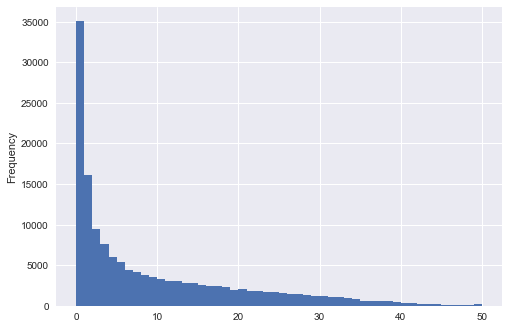

In [13]:
proposed = pd.DataFrame({"fb_engagements": data.fb_engagements, "response_score": scaled_engagements})
proposed.response_score.plot.hist(bins=50)

Now look at how the shares distribute to score:

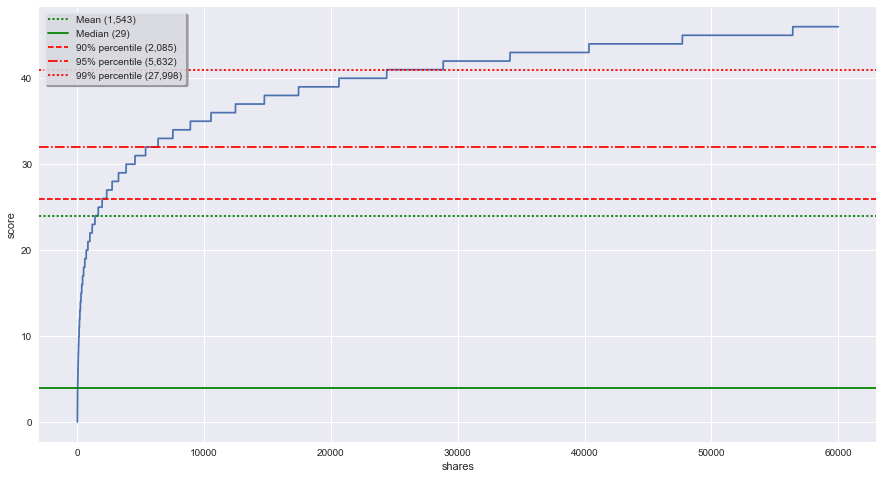

In [14]:
plt.figure(figsize=(15,8))

shares = np.arange(1, 60000)
plt.plot(shares, scale_engagements(shares))
plt.xlabel("shares")
plt.ylabel("score")
plt.axhline(scale_engagements(mean), linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axhline(scale_engagements(median), label=f'Median ({median:,.0f})', color='green')
plt.axhline(scale_engagements(ninety), linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axhline(scale_engagements(ninetyfive), linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
plt.axhline(scale_engagements(ninetynine), linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')

plt.legend(frameon=True, shadow=True)



In [15]:
proposed.groupby("response_score").fb_engagements.agg([np.size, np.min, np.max])

,size,amin,amax
response_score,,,
0.00,35077,0,1
1.00,16107,2,6
2.00,9464,7,12
3.00,7642,13,20
4.00,5955,21,29
5.00,5346,30,40
6.00,4387,41,52
7.00,4140,53,67
8.00,3831,68,85


Looks good to me, lets save that.

In [16]:
data["response_score"] = proposed.response_score

### Proposal

The maximum of 50 points is awarded when the engagements are greater than the 99.9th percentile, rolling over the last month. 

i.e. where $limit$ is the 99.5th percentile of engagements calculated over the previous month, the response score for article $a$ is:

\begin{align}
basicScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   \log(\min(engagements_a,limit) + median(engagements))      & \text{if } engagements_a > 0
\end{cases} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot \frac{basicScore_a - \min(basicScore)}{\max(basicScore) - \min(basicScore)}       & \text{if } engagements_a > 0
\end{cases} \\
\\
\text{The latter equation can be expanded to:} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))}       & \text{if } engagements_a > 0
\end{cases} \\
\end{align}

# Promotion Score

The aim of the promotion score is to indicate how important the article was to the publisher, by tracking where they chose to promote it. This is a number between 0 and 50 comprised of:

- 20 points based on whether the article was promoted as the "lead" story on the publisher's home page
- 15 points based on how long the article was promoted anywhere on the publisher's home page
- 15 points based on whether the article was promoted on the publisher's main facebook brand page

The first two should be scaled by the popularity/reach of the home page, for which we use the alexa page rank as a proxy.

The last should be scaled by the popularity/reach of the brand page, for which we use the number of likes the brand page has.

### Lead story (20 points)

In [17]:
data.mins_as_lead.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count   148391.00
mean         9.64
std        126.32
min          0.00
50%          0.00
75%          0.00
90%          0.00
95%          0.00
99%        269.00
99.5%      590.00
99.9%     1312.66
max      21859.00
Name: mins_as_lead, dtype: float64

As expected, the vast majority of articles don't make it as lead. Let's explore how long typically publishers put something as lead for.

In [18]:
lead_articles = data[data.mins_as_lead > 0]

In [19]:
lead_articles.mins_as_lead.describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count    3815.00
mean      374.78
std       695.67
min         4.00
25%        99.00
50%       190.00
75%       465.00
90%       875.00
95%      1194.00
99%      2163.46
99.5%    2918.80
99.9%    6576.36
max     21859.00
Name: mins_as_lead, dtype: float64

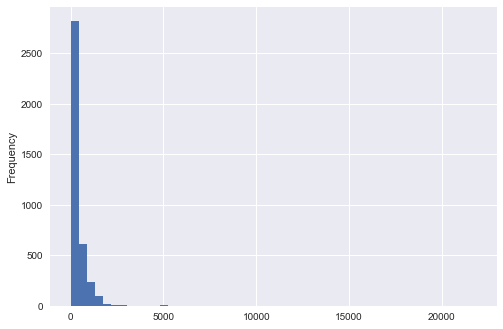

In [20]:
lead_articles.mins_as_lead.plot.hist(bins=50)

For lead, it's a  significant thing for an article to be lead at all, so although we want to penalise articles that were lead for a very short time, mostly we want to score the maximum even if it wasn't lead for ages. So we'll give maximum points when something has been lead for an hour.

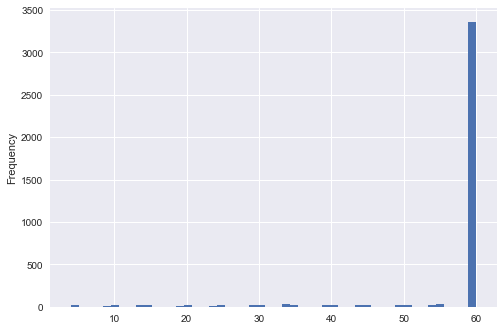

In [21]:
lead_articles.mins_as_lead.clip_upper(60).plot.hist(bins=50)

We also want to scale this by the alexa page rank, such that the maximum score of 20 points is for an article that was on the front for 4 hours for the most popular site.

So lets explore the alexa nunbers.

In [22]:
alexa_ranks = data.groupby(by="publisher_id").alexa_rank.mean().sort_values()
alexa_ranks

publisher_id
bbc_co_uk                               96
cnn_com                                105
nytimes_com                            120
theguardian_com                        142
buzzfeed_com                           147
dailymail_co_uk                        158
washingtonpost_com                     191
huffingtonpost_com                     215
foxnews_com                            285
rt_com                                 365
telegraph_co_uk                        370
independent_co_uk                      386
reuters_com                            497
npr_org                                594
mirror_co_uk                           706
nbcnews_com                            826
breitbart_com                          994
ft_com                                1596
economist_com                         1825
indy100_com                           5014
thetimes_co_uk                        6435
newstatesman_com                     12769
thecanary_co                         1568

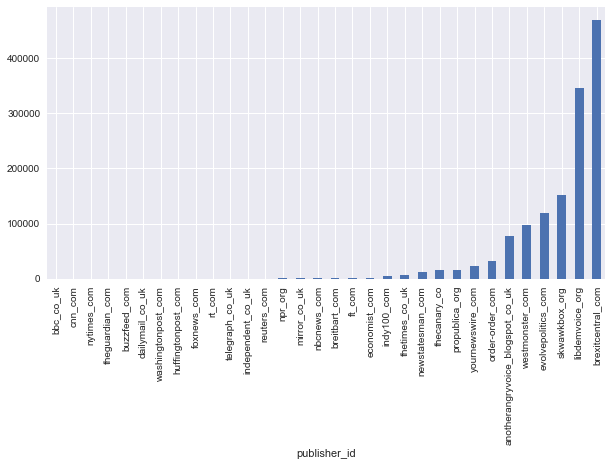

In [23]:
alexa_ranks.plot.bar(figsize=[10,5])

Let's try the simple option first: just divide the number of minutes as lead by the alexa rank. What's the scale of numbers we get then.

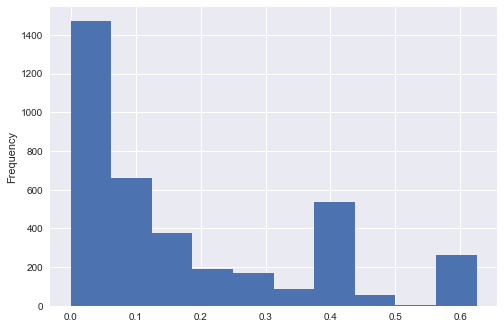

In [24]:
lead_proposal_1 = lead_articles.mins_as_lead.clip_upper(60) / lead_articles.alexa_rank
lead_proposal_1.plot.hist()

Looks like there's too much of a cluster around 0. Have we massively over penalised the publishers with a high alexa rank?

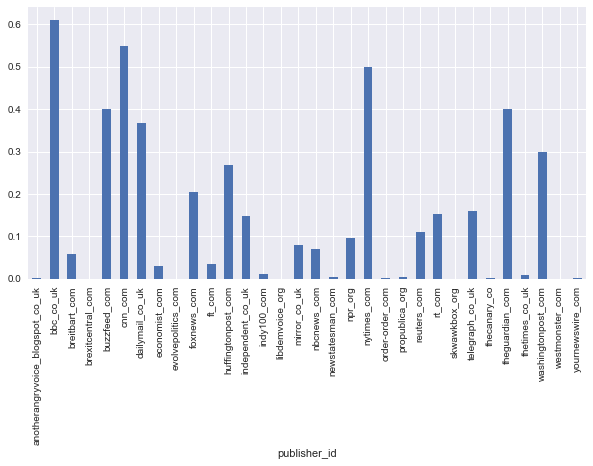

In [25]:
lead_proposal_1.groupby(data.publisher_id).mean().plot.bar(figsize=[10,5])

Yes. Let's try taking the log of the alexa rank and see if that looks better.

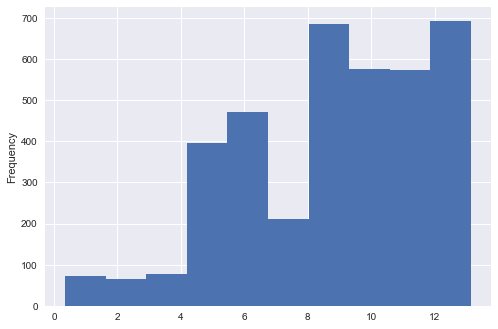

In [26]:
lead_proposal_2 = (lead_articles.mins_as_lead.clip_upper(60) / np.log(lead_articles.alexa_rank))
lead_proposal_2.plot.hist()

In [27]:
lead_proposal_2.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,6.00,5.33,0.00,5.33,5.33,5.33,5.33,5.33
bbc_co_uk,97.00,12.83,1.78,0.88,13.15,13.15,13.15,13.15
breitbart_com,205.00,8.36,1.27,0.72,8.69,8.69,8.69,8.69
brexitcentral_com,21.00,4.41,0.84,0.77,4.59,4.59,4.59,4.59
buzzfeed_com,259.00,11.80,1.08,2.81,12.02,12.02,12.02,12.02
cnn_com,193.00,12.38,1.79,1.07,12.89,12.89,12.89,12.89
dailymail_co_uk,168.00,11.49,1.56,0.99,11.85,11.85,11.85,11.85
economist_com,39.00,7.31,2.02,0.53,7.99,7.99,7.99,7.99
evolvepolitics_com,54.00,4.99,0.60,2.05,5.13,5.13,5.13,5.13


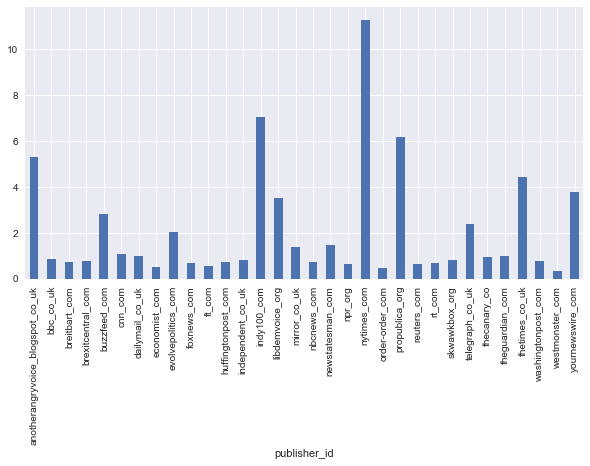

In [28]:
lead_proposal_2.groupby(data.publisher_id).min().plot.bar(figsize=[10,5])

That looks about right, as long as the smaller publishers were closer to zero. So let's apply feature scaling to this, to give a number between 1 and 20. (Anything not as lead will pass though as zero.)

In [29]:
def rescale(series):
    return (series - series.min()) / (series.max() - series.min())

lead_proposal_3 = np.ceil(20 * rescale(lead_proposal_2))

In [30]:
lead_proposal_2.min(), lead_proposal_2.max()

(0.34811595555636582, 13.145359968846892)

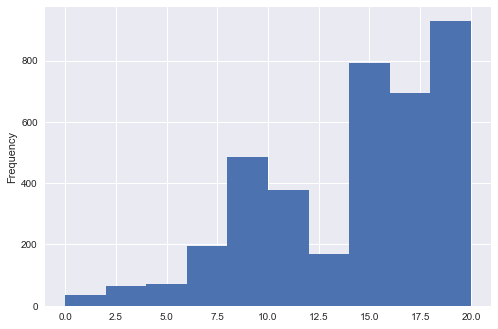

In [31]:
lead_proposal_3.plot.hist()

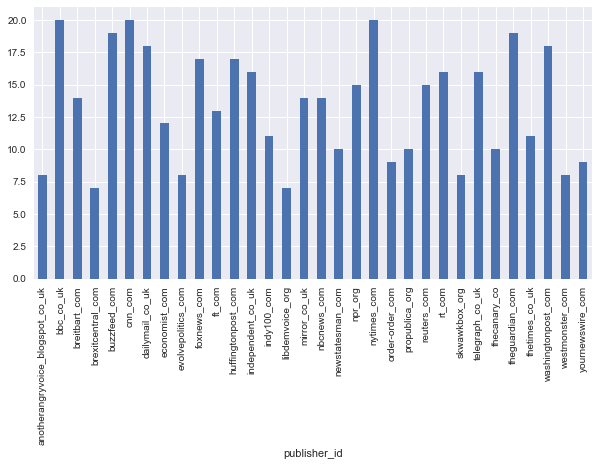

In [32]:
lead_proposal_3.groupby(data.publisher_id).median().plot.bar(figsize=[10,5])

In [33]:
data["lead_score"] = pd.concat([lead_proposal_3, data.mins_as_lead[data.mins_as_lead==0]])

In [34]:
data.lead_score.value_counts().sort_index()

0.00     144577
1.00         34
2.00         38
3.00         28
4.00         38
5.00         33
6.00         44
7.00        150
8.00        246
9.00        240
10.00       230
11.00       148
12.00        62
13.00       107
14.00       577
15.00       215
16.00       360
17.00       335
18.00       237
19.00       373
20.00       319
Name: lead_score, dtype: int64

In [35]:
data.lead_score.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          20.00
breitbart_com                      14.00
brexitcentral_com                   7.00
buzzfeed_com                       19.00
cnn_com                            20.00
dailymail_co_uk                    18.00
economist_com                      12.00
evolvepolitics_com                  8.00
foxnews_com                        17.00
ft_com                             13.00
huffingtonpost_com                 17.00
independent_co_uk                  16.00
indy100_com                        11.00
libdemvoice_org                     7.00
mirror_co_uk                       14.00
nbcnews_com                        14.00
newstatesman_com                   10.00
npr_org                            15.00
nytimes_com                        20.00
order-order_com                     9.00
propublica_org                     10.00
reuters_com                        15.00
rt_com                             16.00
skw

In summary then, score for article $a$ is:


$$
unscaledLeadScore_a = \frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)}\\
leadScore_a = 19 \cdot 
\frac{unscaledLeadScore_a - \min(unscaledLeadScore)}
{\max(unscaledLeadScore) - \min(unscaledLeadScore)} 
+ 1
$$

Since the minium value of $minsAsLead$ is 1, $\min(unscaledLeadScore)$ is pretty insignificant. So we can simplify this to:

$$
leadScore_a = 20 \cdot 
\frac{unscaledLeadScore_a }
     {\max(unscaledLeadScore)} 
$$

or: 

$$
leadScore_a = 20 \cdot 
\frac{\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} }
     {\frac{60}{\log(\max(alexaRank))}} 
$$

$$
leadScore_a = \left( 20 \cdot 
\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} \cdot
     {\frac{\log(\max(alexaRank))}{60}} \right)
$$

## Time on front score (15 points)

This is similar to time as lead, so lets try doing the same calculation, except we also want to factor in the number of slots on the front:


$$frontScore_a = 
15 
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) 
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right)$$

In [36]:
(data.alexa_rank * data.num_articles_on_front).min() / 1440

2.4500000000000002

In [37]:
time_on_front_proposal_1 = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15)

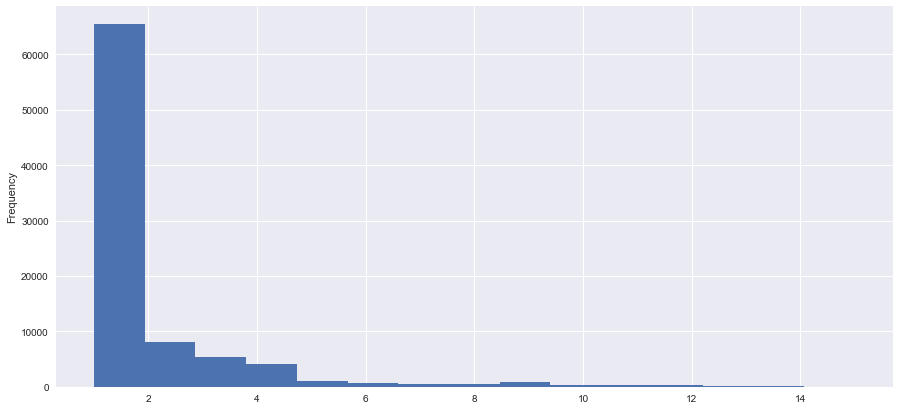

In [38]:
time_on_front_proposal_1.plot.hist(figsize=(15, 7), bins=15)

In [39]:
time_on_front_proposal_1.value_counts().sort_index()

1.00     65394
2.00      8125
3.00      5301
4.00      4167
5.00      1027
6.00       646
7.00       498
8.00       486
9.00       818
10.00      296
11.00      287
12.00      385
13.00      209
14.00       70
15.00       14
dtype: int64

In [40]:
time_on_front_proposal_1.groupby(data.publisher_id).sum()

publisher_id
anotherangryvoice_blogspot_co_uk       6.00
bbc_co_uk                          15580.00
breitbart_com                       2711.00
brexitcentral_com                     23.00
buzzfeed_com                       10173.00
cnn_com                            12205.00
dailymail_co_uk                    13680.00
economist_com                        270.00
evolvepolitics_com                    68.00
foxnews_com                         8774.00
ft_com                              2823.00
huffingtonpost_com                  8296.00
independent_co_uk                   4425.00
indy100_com                          528.00
libdemvoice_org                       94.00
mirror_co_uk                        9846.00
nbcnews_com                         1819.00
newstatesman_com                     468.00
npr_org                             2727.00
nytimes_com                         9632.00
order-order_com                      157.00
propublica_org                        44.00
reuters_com        

That looks good to me.

In [41]:
data["front_score"] = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15).fillna(0)

In [42]:
data.front_score 

id
103d30e1ada75aa031d84f88af50d113184ea4ed    2.00
dedd4245cfa237afcd5f543960e04ae90b26ac48    1.00
18c2ab6d72b11232f9df96b3748b26519368b810    0.00
e798d89b959cf713fe3658c2ee296af4bc9361e5    0.00
092977d2eacec21b414928bf580d5caeb849e9c0    3.00
cbe715858a280b4bec6f036f1adc25d189583ca5    1.00
a7205ddbe6b5245c1299437ff9e1bb886793d3f5    1.00
70dd8ba597cd8967bfee062350c97bc0290f9101    3.00
b0675b893643adfe537b7fdf9cf1a97dccdecbcb    3.00
8408c1851ad0eb71d942fae8826833d358feadf0    1.00
4ef338521090ae5c38420602464ef508fd02669f    0.00
089fffad87b278a4475608a6a592fc2740d9de1b    0.00
dbad7af8248f83bb8cd22260a1e1a4663cb077f3    0.00
be6cdcf31d2030055884d90920f3ccd74737448f    1.00
559c71962376c3643bf92498241c33087b01a9af    0.00
fcf8c33726c529f20fa4df003114f63741aa7f1a    0.00
ba91b5f7e9f278b1e9dc41e8a779d3ef3503f5b8    1.00
741174f3b8d6ad5b55171293f21896571d39d65b    3.00
3b3c880b86419cad71dd3984d78f74dff8b0e3c2    0.00
5542902dc091087011443a4bfe830fd4ab350972    1.00
c7571e74bfc10e822

## Facebook brand page promotion (15 points)

One way a publisher has of promoting content is to post to their brand page. The significance of doing so is stronger when the brand page has more followers (likes).

$$ facebookPromotionProposed1_a = 15 \left( \frac {brandPageLikes_a} {\max(brandPageLikes)} \right) $$

Now lets explore the data to see if that makes sense. **tr;dr the formula above is incorrect**

In [43]:
data.fb_brand_page_likes.max()

43749031.0

In [44]:
facebook_promotion_proposed_1 = np.ceil((15 * (data.fb_brand_page_likes / data.fb_brand_page_likes.max())).fillna(0))

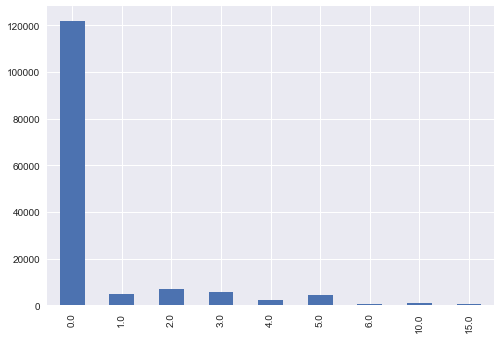

In [45]:
facebook_promotion_proposed_1.value_counts().sort_index().plot.bar()

In [46]:
facebook_promotion_proposed_1.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,6.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
bbc_co_uk,12344.00,0.65,3.07,0.00,0.00,0.00,0.00,15.00
breitbart_com,2778.00,0.79,0.98,0.00,0.00,0.00,2.00,2.00
brexitcentral_com,23.00,0.78,0.42,0.00,1.00,1.00,1.00,1.00
buzzfeed_com,2006.00,0.22,0.42,0.00,0.00,0.00,0.00,1.00
cnn_com,3733.00,2.54,4.35,0.00,0.00,0.00,10.00,10.00
dailymail_co_uk,24170.00,0.58,1.60,0.00,0.00,0.00,0.00,5.00
economist_com,533.00,1.86,1.46,0.00,0.00,3.00,3.00,3.00
evolvepolitics_com,68.00,0.94,0.24,0.00,1.00,1.00,1.00,1.00


That's too much variation: sites like the Guardian, which have a respectable 7.5m likes, should not be scoring a 3. Lets try applying a log to it, and then standard feature scaling again.

In [47]:
data.fb_brand_page_likes.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk     330139.00
bbc_co_uk                          43749031.00
breitbart_com                       3603063.00
brexitcentral_com                      8877.00
buzzfeed_com                        2664517.00
cnn_com                            28192524.00
dailymail_co_uk                    12290016.00
economist_com                       8257357.00
evolvepolitics_com                   111989.00
foxnews_com                        15707378.00
ft_com                              3630731.00
huffingtonpost_com                  9712213.00
independent_co_uk                   7387560.00
indy100_com                          219441.00
libdemvoice_org                        8590.00
mirror_co_uk                        2836406.00
nbcnews_com                         9198972.00
newstatesman_com                     154139.00
npr_org                             6146183.00
nytimes_com                        14517296.00
order-order_com                       44064.00


In [48]:
np.log(2149)

7.6727578966425103

In [49]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max())

publisher_id
anotherangryvoice_blogspot_co_uk   12.71
bbc_co_uk                          17.59
breitbart_com                      15.10
brexitcentral_com                   9.09
buzzfeed_com                       14.80
cnn_com                            17.15
dailymail_co_uk                    16.32
economist_com                      15.93
evolvepolitics_com                 11.63
foxnews_com                        16.57
ft_com                             15.10
huffingtonpost_com                 16.09
independent_co_uk                  15.82
indy100_com                        12.30
libdemvoice_org                     9.06
mirror_co_uk                       14.86
nbcnews_com                        16.03
newstatesman_com                   11.95
npr_org                            15.63
nytimes_com                        16.49
order-order_com                    10.69
propublica_org                     12.76
reuters_com                        15.16
rt_com                             15.33
skw

That's more like it, but the lower numbers should be smaller.

In [50]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max() / 1000)

publisher_id
anotherangryvoice_blogspot_co_uk    5.80
bbc_co_uk                          10.69
breitbart_com                       8.19
brexitcentral_com                   2.18
buzzfeed_com                        7.89
cnn_com                            10.25
dailymail_co_uk                     9.42
economist_com                       9.02
evolvepolitics_com                  4.72
foxnews_com                         9.66
ft_com                              8.20
huffingtonpost_com                  9.18
independent_co_uk                   8.91
indy100_com                         5.39
libdemvoice_org                     2.15
mirror_co_uk                        7.95
nbcnews_com                         9.13
newstatesman_com                    5.04
npr_org                             8.72
nytimes_com                         9.58
order-order_com                     3.79
propublica_org                      5.85
reuters_com                         8.26
rt_com                              8.43
skw

In [51]:
scaled_fb_brand_page_likes = (data.fb_brand_page_likes / 1000)
facebook_promotion_proposed_2 = np.ceil(\
    (15 * \
     (np.log(scaled_fb_brand_page_likes) / np.log(scaled_fb_brand_page_likes.max()))\
    )\
                                       ).fillna(0)

In [52]:
facebook_promotion_proposed_2.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    9.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   4.00
buzzfeed_com                       12.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  7.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         8.00
libdemvoice_org                     4.00
mirror_co_uk                       12.00
nbcnews_com                        13.00
newstatesman_com                    8.00
npr_org                            13.00
nytimes_com                        14.00
order-order_com                     6.00
propublica_org                      9.00
reuters_com                        12.00
rt_com                             12.00
skw

LGTM. So the equation is


$$ facebookPromotion_a = 15 \left( 
\frac {\log(\frac {brandPageLikes_a}{1000})} 
{\log(\frac {\max(brandPageLikes)}{1000}))} \right) $$


Now, let's try applying standard feature scaling approch to this, rather than using a magic number of 1,000. That equation would be:

\begin{align}
unscaledFacebookPromotion_a &= 
   \log(brandPageLikes_a) \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \min(unscaledFacebookPromotion)}{\max(unscaledFacebookPromotion) - \min(unscaledFacebookPromotion)}  \\
\\
\text{The scaling can be simplified to:} \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \\
\\
\text{Meaning the overall equation becomes:} \\
facebookPromotion_a &= 
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))} 
   \end{align}


In [53]:
facebook_promotion_proposed_3 = np.ceil(
    (14 * 
     ( 
         (np.log(data.fb_brand_page_likes) - np.log(data.fb_brand_page_likes.min()) ) /
         (np.log(data.fb_brand_page_likes.max()) - np.log(data.fb_brand_page_likes.min()))
     )
    ) + 1
                                       )

In [54]:
facebook_promotion_proposed_3.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   2.00
buzzfeed_com                       11.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  6.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         7.00
libdemvoice_org                     2.00
mirror_co_uk                       11.00
nbcnews_com                        13.00
newstatesman_com                    7.00
npr_org                            12.00
nytimes_com                        14.00
order-order_com                     5.00
propublica_org                      8.00
reuters_com                        12.00
rt_com                             12.00
skw

In [55]:
data["facebook_promotion_score"] = facebook_promotion_proposed_3.fillna(0.0)

# Review

In [56]:
data["promotion_score"] = (data.lead_score + data.front_score + data.facebook_promotion_score)
data["attention_index"] = (data.promotion_score + data.response_score)

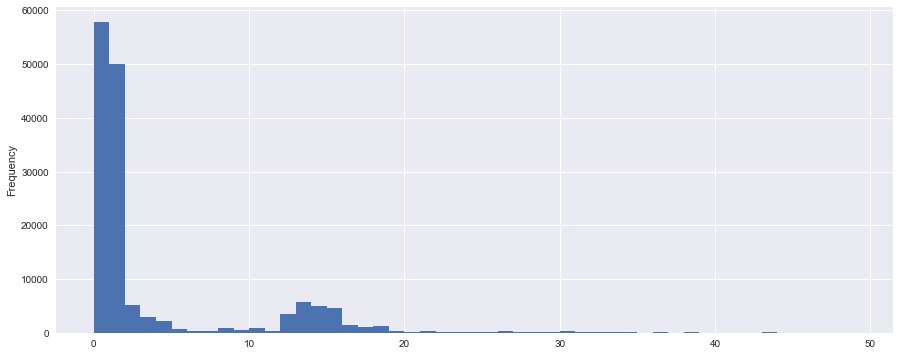

In [57]:
data.promotion_score.plot.hist(bins=np.arange(50), figsize=(15,6))

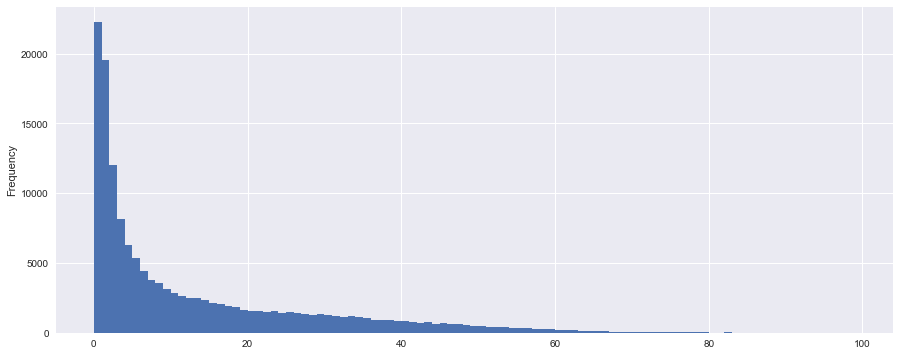

In [58]:
data.attention_index.plot.hist(bins=np.arange(100), figsize=(15,6))

In [59]:
data.attention_index.value_counts().sort_index()

0.00     22256
1.00     19523
2.00     12051
3.00      8175
4.00      6257
5.00      5327
6.00      4421
7.00      3790
8.00      3578
9.00      3139
10.00     2826
11.00     2662
12.00     2523
13.00     2470
14.00     2380
15.00     2117
16.00     2063
17.00     1951
18.00     1878
19.00     1656
20.00     1591
21.00     1587
22.00     1487
23.00     1591
24.00     1406
25.00     1490
26.00     1423
27.00     1381
28.00     1286
29.00     1350
         ...  
65.00      118
66.00      130
67.00       76
68.00       82
69.00       72
70.00       68
71.00       50
72.00       52
73.00       39
74.00       42
75.00       26
76.00       28
77.00       25
78.00       30
79.00       27
80.00       20
81.00       21
82.00       25
83.00       16
84.00       13
85.00       10
86.00       18
87.00       14
88.00       13
89.00        4
90.00        7
91.00        7
92.00        2
93.00        4
94.00        4
Name: attention_index, Length: 95, dtype: int64

In [60]:
# and lets see the articles with the biggest attention index
data.sort_values("attention_index", ascending=False)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index
id,,,,,,,,,,,,,,,,,,,,,
5bc8df6cf7ba6fda075fdec7a8a27e5b00a054fb,http://www.bbc.co.uk/news/world-europe-40965581,Injuries as van hits crowds in Barcelona,2017-08-17 15:21:04.046,2017-08-17 15:19:47.000,173441,675.67,2017-08-17T17:10:00.551Z,35777,107789,29875,...,True,43501654.00,2017-08-17T21:03:24.000Z,96,50.00,20.00,9.00,15.00,44.00,94.00
f9a431a718aea4611db8680cb9a2b32935932221,https://www.buzzfeed.com/anupkaphle/south-asia...,South Asia Is Also Experiencing The Worst Floo...,2017-08-29 10:21:13.664,2017-08-29 09:38:35.000,405094,182.59,2017-08-30T01:03:59.596Z,29194,303992,71908,...,True,2663443.00,2017-09-03T00:10:00.000Z,147,50.00,19.00,14.00,11.00,44.00,94.00
9d3d837c118469c6be614d62b79ccc67d4222ed6,http://www.cnn.com/2017/08/20/asia/us-navy-des...,US destroyer collides with merchant ship near ...,2017-08-21 00:03:14.430,2017-08-20 23:58:37.000,137608,267.58,2017-08-21T02:27:59.624Z,42828,72468,22312,...,True,28047682.00,2017-08-21T00:30:29.000Z,105,50.00,20.00,9.00,15.00,44.00,94.00
2f7b62a0d2a4675bfaa7b32ec314ce5acf001ac9,http://www.cnn.com/2017/08/12/us/charlottesvil...,Torch-bearing white nationalists march ahead o...,2017-08-12 06:27:27.189,2017-08-12 06:22:15.000,422742,704.31,2017-08-12T16:41:59.688Z,117325,250533,54884,...,True,28007316.00,2017-08-12T16:32:58.000Z,105,50.00,20.00,9.00,15.00,44.00,94.00
5c22bca605c658ebd6d1afbadd26884feb2f2fb4,https://www.buzzfeed.com/davidmack/ehs-cheerle...,Police Are Investigating This Video Of A Teen ...,2017-08-24 15:30:12.427,2017-08-24 15:04:18.000,117849,170.40,2017-08-24T17:33:59.839Z,35187,70329,12333,...,True,2649391.00,2017-08-24T23:34:00.000Z,147,50.00,19.00,13.00,11.00,43.00,93.00
8e3d4660760facbf3164d02034b7b726ffd7716b,https://www.buzzfeed.com/kristinharris/taylor-...,Taylor Swift Just Announced Her New Album And ...,2017-08-23 18:05:10.321,2017-08-23 17:02:32.000,112303,878.50,2017-08-23T19:06:02.548Z,21292,82021,8990,...,True,2646799.00,2017-08-23T18:02:40.000Z,147,50.00,19.00,13.00,11.00,43.00,93.00
2a7d9f5e137fe37f993840df08c956a63ea8a9f1,http://www.cnn.com/2017/08/25/us/hurricane-har...,Hurricane Harvey strengthens to Category 2,2017-08-25 06:18:13.423,2017-08-25 06:15:26.000,168217,305.26,2017-08-25T16:54:00.927Z,38640,111205,18372,...,True,28100799.00,2017-08-25T06:45:02.000Z,105,50.00,20.00,8.00,15.00,43.00,93.00
f5f4bbb52b32df81f30e9f83cb79fd090c90b048,http://www.cnn.com/2017/08/31/us/hurricane-irm...,Powerful Hurricane Irma could be next weather ...,2017-08-31 23:09:18.131,2017-08-31 23:04:08.000,155332,295.08,2017-09-01T03:14:00.674Z,30702,95261,29369,...,True,28173209.00,2017-09-01T03:00:46.000Z,105,50.00,20.00,8.00,15.00,43.00,93.00
513f414d516e4d00495c7d9bf28359787432cbd5,http://www.cnn.com/2017/08/03/politics/mueller...,"One year into the FBI's Russia investigation, ...",2017-08-03 20:03:27.148,2017-08-03 19:59:07.000,96561,427.50,2017-08-03T21:16:03.290Z,19602,66142,10817,...,True,27957228.00,2017-08-03T20:07:04.000Z,105,49.00,20.00,8.00,15.00,43.00,92.00


In [61]:
data["score_diff"] = data.promotion_score - data.response_score

In [62]:
# promoted but low response
data.sort_values("score_diff", ascending=False).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_likes,fb_brand_page_time,alexa_rank,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
a96c040af2ed0a2561a1bf0f4c19297f271ae3ed,http://www.bbc.co.uk/news/world-europe-41057304,Man shot after attacking Brussels troops,2017-08-25 19:33:00.838,2017-08-25 19:30:37,0,147.96,2017-08-25T21:10:02.357Z,0,0,0,...,43641284.00,2017-08-25T19:37:22.000Z,96,0.00,20.00,10.00,15.00,45.00,45.00,45.00
5dd70fc9ea42b2d127033bcd64660f1940030c92,http://www.bbc.co.uk/news/world-europe-40982926,Key Barcelona attack suspect confirmed dead,2017-08-18 20:30:03.116,2017-08-18 20:29:14,0,1668.82,2017-08-19T21:52:00.484Z,0,0,0,...,43518815.00,2017-08-18T20:35:08.000Z,96,0.00,20.00,10.00,15.00,45.00,45.00,45.00
a891d138c2bcf31d948afcfb856a59f991d78e4f,http://www.bbc.co.uk/news/world-us-canada-4090...,Trump: US 'locked and loaded' on N Korea,2017-08-11 11:42:01.493,2017-08-11 11:39:05,0,2549.83,2017-08-12T19:19:59.811Z,0,0,0,...,43416675.00,2017-08-11T11:48:41.000Z,96,0.00,20.00,8.00,15.00,43.00,43.00,43.00
7871898fe8e346056041debe5afffde02118dd33,https://www.buzzfeed.com/melissasegura/sixteen...,Sixteen Years Ago He Was Granted A New Hearing...,2017-08-25 09:51:14.099,2017-08-23 01:44:46,0,0.00,2017-08-25T10:04:01.518Z,0,0,0,...,2650108.00,2017-08-25T14:48:20.000Z,147,0.00,19.00,13.00,11.00,43.00,43.00,43.00
2eee49e0cf12b7f87a2cdafb4cabfd17bdb53965,https://www.buzzfeed.com/borzoudaragahi/these-...,These Are The Western Fighters Who Volunteered...,2017-08-13 14:06:14.093,2017-08-09 14:00:57,1,0.08,2017-08-13T14:20:01.132Z,0,0,1,...,2638724.00,2017-08-13T18:33:00.000Z,147,0.00,19.00,13.00,11.00,43.00,43.00,43.00
de58848c3fba3550be9fa164194024dc17baacb3,https://www.buzzfeed.com/claudiarosenbaum/tayl...,Taylor Swift's Trial Over A DJ Allegedly Grabb...,2017-08-05 12:21:17.776,2017-08-01 18:54:02,3,0.25,2017-08-05T12:34:01.753Z,0,0,3,...,2626421.00,2017-08-05T17:39:00.000Z,147,1.00,19.00,14.00,11.00,44.00,45.00,43.00
e0e54d8a3ca097df78e14a8ca6d30abb26e5ecb9,https://www.buzzfeed.com/leticiamiranda/scams-...,People Are Losing A Bunch Of Money From These ...,2017-08-17 15:42:18.068,2017-08-16 15:28:55,2,0.17,2017-08-17T15:56:01.851Z,0,0,2,...,2643708.00,2017-08-17T18:09:00.000Z,147,1.00,19.00,14.00,11.00,44.00,45.00,43.00
6666e26a4ec8a7875c73b728cad8f353e2045bc4,https://www.buzzfeed.com/borzoudaragahi/the-wa...,The US Is Far More Deeply Involved In Syria Th...,2017-08-06 15:12:15.694,2017-08-05 15:12:13,3,0.25,2017-08-06T15:26:00.707Z,0,0,3,...,2627238.00,2017-08-06T22:40:00.000Z,147,1.00,19.00,14.00,11.00,44.00,45.00,43.00
927c56158391f50dfc3b1549195deebf175e2478,https://www.buzzfeed.com/tylerkingkade/want-to...,Want To Fire A Professor For Sexual Harassment...,2017-08-17 14:09:15.759,2017-08-15 15:41:29,1,0.08,2017-08-17T14:22:01.807Z,0,0,1,...,2643633.00,2017-08-17T16:39:00.000Z,147,0.00,19.00,12.00,11.00,42.00,42.00,42.00


In [63]:
# high response but not promoted
data.sort_values("score_diff", ascending=True).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_likes,fb_brand_page_time,alexa_rank,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
18189c494eb422d1b0ab26167076175e05a18985,https://www.washingtonpost.com/local/the-lates...,"The Latest: Police identify helicopter, troope...",2017-08-13 01:06:07.377,2017-08-13 01:04:19.000,339268,4231.07,2017-08-13T05:28:00.473Z,90555,207253,41460,...,nan,NaN,191,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
bf626f6b535a51ccffbebca41b61027d9dc8bf6d,http://www.cnn.com/2016/01/06/health/adult-col...,Why adult coloring books are good for you,2017-08-01 17:42:17.336,2017-08-01 17:37:24.000,255341,1.31,2017-08-02T16:39:59.574Z,52448,162431,40462,...,nan,NaN,105,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
ecd92911b177889b3a902a7ddfde0d1ff086f8c4,http://www.huffingtonpost.com/entry/remove-him...,Remove Him Now,2017-08-19 18:03:21.545,2017-08-19 17:48:07.484,105278,213.55,2017-08-20T00:40:00.669Z,10282,87549,7447,...,nan,NaN,215,49.00,0.00,0.00,0.00,0.00,49.00,-49.00
284b3454ef8d5235469a5c32f9ea20ba029b9ff4,http://www.foxnews.com/us/2017/08/14/boston-ho...,Boston Holocaust Memorial smashed to pieces,2017-08-15 00:25:03.656,2017-08-15 00:09:00.000,130061,90.42,2017-08-15T20:36:00.218Z,26095,87829,16137,...,nan,NaN,285,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
976ee1af9f57e6a45c1a02cc7a05cc6eccfa498b,http://www.huffingtonpost.com/entry/the-proble...,The Problem With Melania Isn't Her Shoes,2017-08-31 01:03:14.487,2017-08-31 00:47:41.413,95153,207.42,2017-09-02T15:08:00.267Z,18286,67948,8919,...,nan,NaN,215,49.00,0.00,0.00,0.00,0.00,49.00,-49.00
9d5416e1d850656cec86528c97dfeef0b738d032,http://yournewswire.com/charlottesville-hillar...,"Charlottesville Killer Was Hillary Supporter, ...",2017-08-13 20:35:16.681,2017-08-13 19:04:01.000,162946,102.64,2017-08-14T14:12:00.081Z,65217,66428,31301,...,nan,NaN,22568,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
0a5ef01bb7614fe47fe1e2bff6ed8d90b3bf88d1,https://www.rt.com/on-air/400998-barcelona-ant...,Anti-terrorism march in Barcelona in wake of a...,2017-08-26 16:20:14.530,2017-08-26 16:20:14.530,175444,2826.47,2017-08-26T23:48:01.315Z,24072,10417,140955,...,nan,NaN,365,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
558e0d04a7977fafaee4d2c5e7f78d514470d153,https://www.buzzfeed.com/alexandrearagao/esse-...,Esse é o tamanho da área que Temer liberou par...,2017-08-24 20:33:16.676,2017-08-24 20:32:56.000,79416,185.92,2017-08-25T19:52:00.145Z,4568,65462,9386,...,nan,NaN,147,48.00,0.00,0.00,0.00,0.00,48.00,-48.00
597bc58ed2caa997c80434e8db5fa7f37d0167bc,http://www.foxnews.com/us/2017/08/04/planned-p...,Planned Parenthood: Teach your preschoolers 't...,2017-08-04 15:15:06.479,2017-08-04 12:29:00.000,275925,166.25,2017-08-07T16:22:00.043Z,100038,147626,28261,...,nan,NaN,285,50.00,0.00,2.00,0.00,2.00,52.00,-48.00


Write that data to a file. Note that the scores here are provisional for two reasons:
1. they should be using a rolling-month based on the article publication date to calculate medians/min/max etc, whereas in this workbook we as just using values for the month of May
2. for analysis, we've rounded the numbers; we don't expect to do that for the actual scores

In [64]:
data.to_csv("articles_with_provisional_scores_2017-08-01_2017-08-31.csv")

# Summary

The attention index of an article is comprised of four components:

- *lead score* (max 20 points) based on how long an article was the lead story on the publisher's home page, scaled by the traffic to that publisher
- *front score* (max 15 points) based on how long an article was present on the publisher's home page, scaled by traffic to that publisher
- *Facebook promotion score* (max 15 points) based on whether the article was promoted to the publisher's Facebook brand page, scaled by the reach of that brand page
- *response score* (max 50 points) based on the number of Facebook engagements the article received, relative to other articles

Or, in other words:

\begin{align}
attentionIndex_a &= leadScore_a + frontScore_a + facebookPromotionScore_a + responseScore_a \\
leadScore_a &= 20 \cdot \left(\frac{\min(minsAsLead_a, 60)}{alexaRank_a}\right) \cdot \left( \frac{\min(alexaRank)}{60} \right) \\
frontScore_a &= 
15 \cdot
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) \cdot
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right) \\
facebookPromotion_a &= 
\begin{cases}
 0 \text{ if not shared on brand page }\\
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \text{ otherwise }
\end{cases}   
\\
responseScore_a &= 
\begin{cases} 
   0 \text{ if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))} \text{ if } engagements_a > 0
\end{cases} \\
\end{align} 